Pattern Recognition Second Homework

Qiaojun Feng 2013011460

First import some package that we NEED.

In [17]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

Let's read the data from the .txt file first.

In [18]:
file_train = open("dataset3.txt")
file_test = open("dataset4.txt")
x_train = []
y_train = []
x_test = []
y_test = []

while 1:
    line_train = file_train.readlines()
    line_test = file_test.readlines()
    if not line_train:
        break
    for line in line_train:
        line = line.strip("\n")     
        xys = line.split("\t")
        x_train.append([float(xy) for xy in xys[:-1]])  
        if xys[-1] == 'F' or xys[-1] == 'f':
            y_train.append(0);
        else:
            y_train.append(1);
    if not line_test:
        break
    for line in line_test:
        line = line.strip("\n")    
        xys = line.split("\t")
        x_test.append([float(xy) for xy in xys[:-1]])       
        if xys[-1] == 'F' or xys[-1] == 'f':
            y_test.append(0);
        else:
            y_test.append(1);                      
file_train.close()
file_test.close()
print("Loaded the training dataset and testing dataset")
print("Training: %3d persons in total, %3d Male, %3d Female. Female contain %.2f%%"
      %(len(y_train),y_train.count(1),y_train.count(0),y_train.count(0)/len(y_train)*100))
print("Testing:  %3d persons in total, %3d Male, %3d Female. Female contain %.2f%%"
      %(len(y_test),y_test.count(1),y_test.count(0),y_test.count(0)/len(y_test)*100))
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

Loaded the training dataset and testing dataset
Training: 954 persons in total, 485 Male, 469 Female. Female contain 49.16%
Testing:  328 persons in total, 250 Male,  78 Female. Female contain 23.78%


Randomly pick 10 Female and 10 Male as training set

In [19]:
random.seed(2016)

random_train_index = []
random_train_index.extend(random.sample(range(0,np.where(y_train==1)[0][0]),10))
random_train_index.extend(random.sample(range(np.where(y_train==1)[0][0],len(y_train)),10))
#random_train_index = np.array(random_train_index)
print("The 10 Female & 10 Male 's index:")
print(random_train_index)
scaler1 = preprocessing.StandardScaler().fit(x_train)
scaler2 = preprocessing.StandardScaler().fit(x_train[:,[2,4]])

The 10 Female & 10 Male 's index:
[377, 442, 229, 456, 282, 448, 426, 131, 453, 349, 946, 829, 510, 887, 620, 534, 505, 718, 937, 711]


There are 4 kinds of classifiers together I tried

## 1 Minimum-Error-Rate Bayesian Classifier

In [20]:
print("Bayesian:")
clf1_B = GaussianNB(priors = [0.5,0.5]).fit(scaler1.transform(x_train[random_train_index]), y_train[random_train_index])
print("With 10 features and  20 training sample, Error Rate is %.4f"
      %(1-clf1_B.score(scaler1.transform(x_test),y_test)))
clf3_B = GaussianNB(priors = [0.5,0.5]).fit(scaler2.transform(x_train[random_train_index][:,[2,4]]), y_train[random_train_index])
print("With  2 features and  20 training sample, Error Rate is %.4f"
      %(1-clf3_B.score(scaler2.transform(x_test[:,[2,4]]),y_test)))
clf2_B = GaussianNB(priors = [0.5,0.5]).fit(scaler1.transform(x_train), y_train)
print("With 10 features and all training sample, Error Rate is %.4f"
      %(1-clf2_B.score(scaler1.transform(x_test),y_test)))
clf4_B = GaussianNB(priors = [0.5,0.5]).fit(scaler2.transform(x_train[:,[2,4]]), y_train)
print("With  2 features and all training sample, Error Rate is %.4f"
      %(1-clf4_B.score(scaler2.transform(x_test[:,[2,4]]),y_test)))

Bayesian:
With 10 features and  20 training sample, Error Rate is 0.1616
With  2 features and  20 training sample, Error Rate is 0.1555
With 10 features and all training sample, Error Rate is 0.1341
With  2 features and all training sample, Error Rate is 0.1189


## 2 Linear Discriminant Analysis(LDA)

In [21]:
print("LDA:")
clf1_L = LinearDiscriminantAnalysis(priors = [0.5,0.5]).fit(scaler1.transform(x_train[random_train_index]), y_train[random_train_index])
print("With 10 features and  20 training sample, Error Rate is %.4f"
      %(1-clf1_L.score(scaler1.transform(x_test),y_test)))
clf3_L = LinearDiscriminantAnalysis(priors = [0.5,0.5]).fit(scaler2.transform(x_train[random_train_index][:,[2,4]]), y_train[random_train_index])
print("With  2 features and  20 training sample, Error Rate is %.4f"
      %(1-clf3_L.score(scaler2.transform(x_test[:,[2,4]]),y_test)))
clf2_L = LinearDiscriminantAnalysis(priors = [0.5,0.5]).fit(scaler1.transform(x_train), y_train)
print("With 10 features and all training sample, Error Rate is %.4f"
      %(1-clf2_L.score(scaler1.transform(x_test),y_test)))
clf4_L = LinearDiscriminantAnalysis(priors = [0.5,0.5]).fit(scaler2.transform(x_train[:,[2,4]]), y_train)
print("With  2 features and all training sample, Error Rate is %.4f"
      %(1-clf4_L.score(scaler2.transform(x_test[:,[2,4]]),y_test)))

LDA:
With 10 features and  20 training sample, Error Rate is 0.2104
With  2 features and  20 training sample, Error Rate is 0.1585
With 10 features and all training sample, Error Rate is 0.1006
With  2 features and all training sample, Error Rate is 0.1159


## 3 Linear Support Vector Machine

In [22]:
print("Linear SVM:")
clf1_S = SVC(kernel='linear').fit(scaler1.transform(x_train[random_train_index]), y_train[random_train_index])
print("With 10 features and  20 training sample, Error Rate is %.4f"
      %(1-clf1_S.score(scaler1.transform(x_test),y_test)))
clf3_S = SVC(kernel='linear').fit(scaler2.transform(x_train[random_train_index][:,[2,4]]), y_train[random_train_index])
print("With  2 features and  20 training sample, Error Rate is %.4f"
      %(1-clf3_S.score(scaler2.transform(x_test[:,[2,4]]),y_test)))
clf2_S = SVC(kernel='linear').fit(scaler1.transform(x_train), y_train)
print("With 10 features and all training sample, Error Rate is %.4f"
      %(1-clf2_S.score(scaler1.transform(x_test),y_test)))
clf4_S = SVC(kernel='linear').fit(scaler2.transform(x_train[:,[2,4]]), y_train)
print("With  2 features and all training sample, Error Rate is %.4f"
      %(1-clf4_S.score(scaler2.transform(x_test[:,[2,4]]),y_test)))

Linear SVM:
With 10 features and  20 training sample, Error Rate is 0.1433
With  2 features and  20 training sample, Error Rate is 0.1555
With 10 features and all training sample, Error Rate is 0.1159
With  2 features and all training sample, Error Rate is 0.1128


## 4 Multi-Layer Perceptron(MLP)

In [23]:
print("MLP:")
clf1_P = MLPClassifier(hidden_layer_sizes = (3,),activation = 'relu',random_state = 2017,max_iter = 2000
                      ).fit(scaler1.transform(x_train[random_train_index]), y_train[random_train_index])
print("With 10 features and  20 training sample, Error Rate is %.4f. With iterations %d"
      %(1-clf1_P.score(scaler1.transform(x_test),y_test),clf1_P.n_iter_))
clf3_P = MLPClassifier(hidden_layer_sizes = (3,),activation = 'relu',random_state = 2017,max_iter = 2000
                      ).fit(scaler2.transform(x_train[random_train_index][:,[2,4]]), y_train[random_train_index])
print("With  2 features and  20 training sample, Error Rate is %.4f. With iterations %d"
      %(1-clf3_P.score(scaler2.transform(x_test[:,[2,4]]),y_test),clf3_P.n_iter_))
clf2_P = MLPClassifier(hidden_layer_sizes = (3,),activation = 'relu',random_state = 2017,max_iter = 2000
                      ).fit(scaler1.transform(x_train), y_train)
print("With 10 features and all training sample, Error Rate is %.4f. With iterations %d"
      %(1-clf2_P.score(scaler1.transform(x_test),y_test),clf2_P.n_iter_))
clf4_P = MLPClassifier(hidden_layer_sizes = (3,),activation = 'relu',random_state = 2017,max_iter = 2000
                      ).fit(scaler2.transform(x_train[:,[2,4]]), y_train)
print("With  2 features and all training sample, Error Rate is %.4f. With iterations %d"
      %(1-clf4_P.score(scaler2.transform(x_test[:,[2,4]]),y_test),clf4_P.n_iter_))

MLP:
With 10 features and  20 training sample, Error Rate is 0.1707. With iterations 1064
With  2 features and  20 training sample, Error Rate is 0.1524. With iterations 1709
With 10 features and all training sample, Error Rate is 0.1159. With iterations 189
With  2 features and all training sample, Error Rate is 0.0976. With iterations 230


### Then we want to see how it actually works on the testing dataset.
### So we draw the graph.

In [24]:
h = 0.1  # step size in the mesh
x_min, x_max = x_test[:,2].min() - 1, x_test[:,2].max() + 1
y_min, y_max = x_test[:,4].min() - 1, x_test[:,4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
titles = ['Bayesian',
          'LDA',
          'LinearSVM',
          'MLP']

### 2 features trained on 20 samples

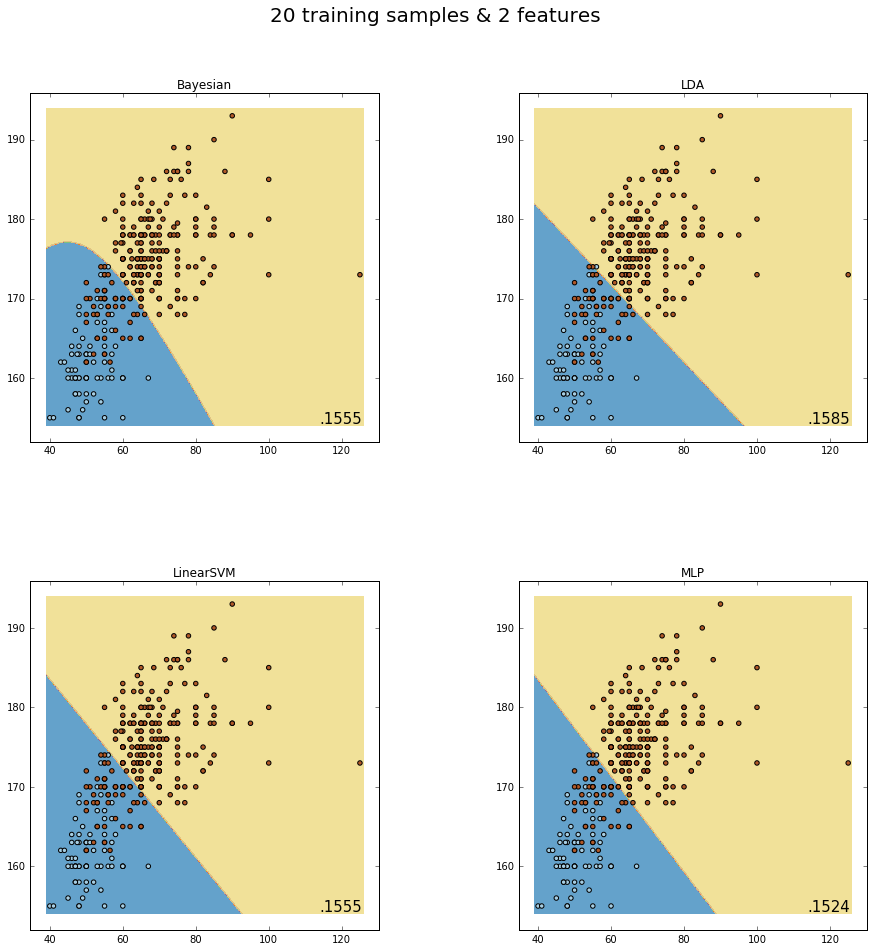

In [30]:
plt.figure(figsize=(15,15))
for i, clf in enumerate((clf3_B,clf3_L,clf3_S,clf3_P)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(scaler2.transform(np.c_[xx.ravel(), yy.ravel()]))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x_test[:,2], x_test[:,4], c=y_test, cmap=plt.cm.Paired)
    plt.title(titles[i])
    score = 1 - clf.score(scaler2.transform(x_test[:,[2,4]]), y_test)
    plt.text(xx.max() - .3, yy.min() + .3, ('%.4f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    
plt.suptitle("20 training samples & 2 features",size = 20)
plt.show()

### 2 features trained on all samples

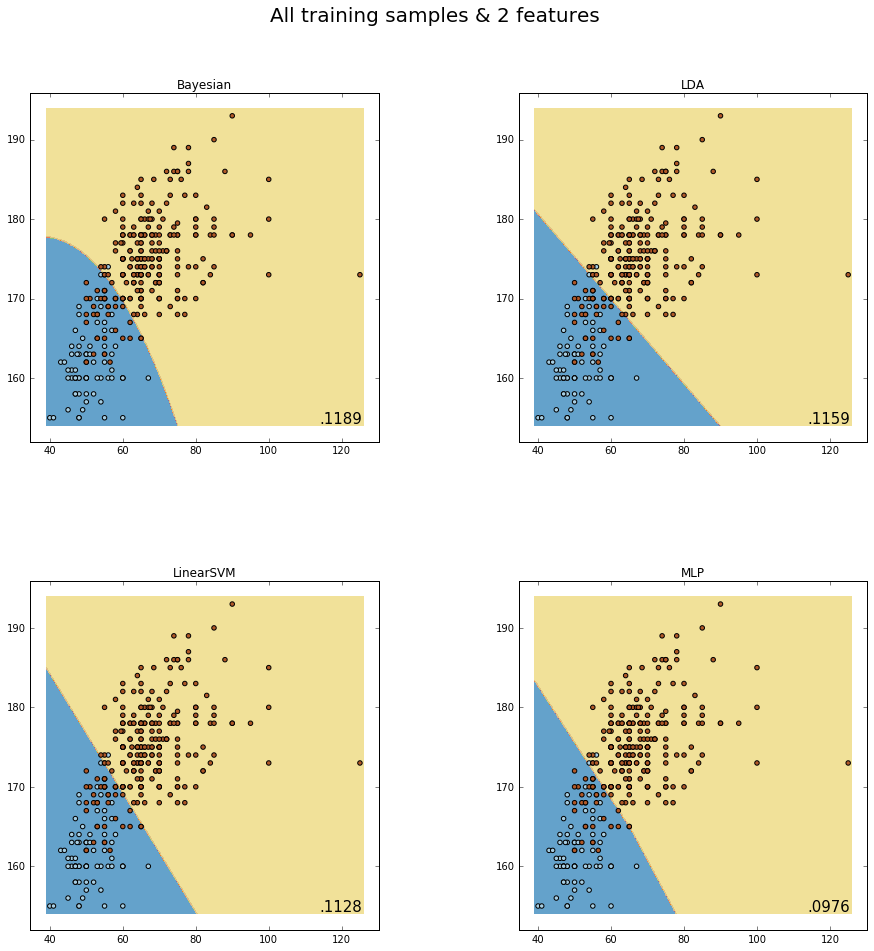

In [29]:
plt.figure(figsize=(15,15))
for i, clf in enumerate((clf4_B,clf4_L,clf4_S,clf4_P)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(scaler2.transform(np.c_[xx.ravel(), yy.ravel()]))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(x_test[:,2], x_test[:,4], c=y_test, cmap=plt.cm.Paired)
    plt.title(titles[i])
    score = 1 - clf.score(scaler2.transform(x_test[:,[2,4]]), y_test)
    plt.text(xx.max() - .3, yy.min() + .3, ('%.4f' % score).lstrip('0'),
                size=15, horizontalalignment='right')    

plt.suptitle("All training samples & 2 features",size = 20)
plt.show()